In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import math
import sympy as sy

##Sample polar plot for syntax practice

In [ ]:
# plt.axes(projection = 'polar')
# t = np.linspace(0,1,100)
# r = [2 + 0.2*np.sin(10*np.pi*i) for i in t]
# thetas = [2*np.pi*i for i in t]
# plt.polar(thetas, r, 'g')
# plt.show()

##Trajectory plot - Angular velocities

In [ ]:
a=1.0
b=4.0
c=0.4
t_s = np.linspace(0,20,150)
# print(t_s.size)
w1 = -2*np.pi/14
w21 = 2*np.pi/5
def w32(t):
  return 3.0*sy.sin(w1*t)
def theta1(t):
  return float(w1*t)
def theta2(t):
  return float(w21*t)

p = sy.Symbol("p")
def theta3(i):
  return sy.integrate(  w32(p),(p,0.0,i)  )

##Finding angles and radial distance

In [ ]:
def deltaTheta2(t):
  return np.arctan(   np.sin(theta2(t))    /    (   b/a + np.cos(theta2(t))   )   )
def x(t):
  return np.sqrt( a**2+b**2+2*a*b*np.cos(theta2(t))  )
def r(t):
  return sy.sqrt(  x(t)**2 + c**2 + 2*x(t)*c*sy.cos(theta3(t)+theta2(t)-deltaTheta2(t))   )
def deltaTheta3(t):
  return sy.asin( (c/r(t)) * sy.sin(theta3(t)+theta2(t) - deltaTheta2(t))   )
def theta(t):
  return theta1(t) + deltaTheta2(t) + deltaTheta3(t)

##Polar plot

In [ ]:
# plt.axes(projection = 'polar')
# thetas = [0.0]*300
# for i in range(300):
#   thetas[i]=theta(i)
# # thetas = [theta(i) for i in t_s ]
# radii = [r(i) for i in t_s]
# plt.polar(thetas, radii, 'g')

##Plot main frame trajectory

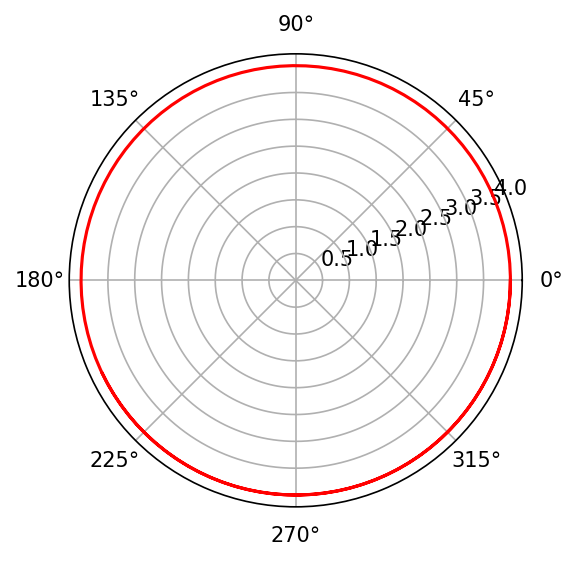

In [ ]:
plt.axes(projection = 'polar')
theta1_matrix = [theta1(i) for i in t_s]
b_matrix=[4]*150
plt.polar(theta1_matrix, b_matrix,'r')

##Plot main+secondary frame trajectory

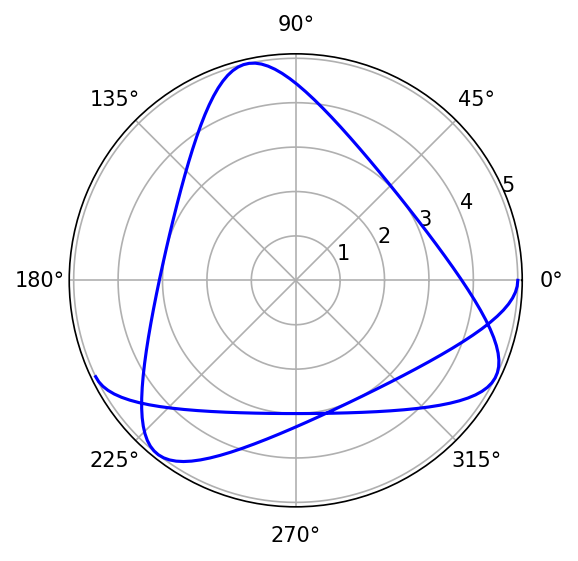

In [ ]:
plt.axes(projection = 'polar')

def r_sec(t):
  return np.sqrt(a**2+b**2+2*a*b*np.cos(theta2(t)))

r_matrix = [r_sec(i) for i in t_s]

def theta_sec(t):
  return theta1(t)+deltaTheta2(t)

theta_sec_matrix = [theta_sec(i) for i in t_s]

plt.polar(theta_sec_matrix, r_matrix,'b')

##Plot final trajectory

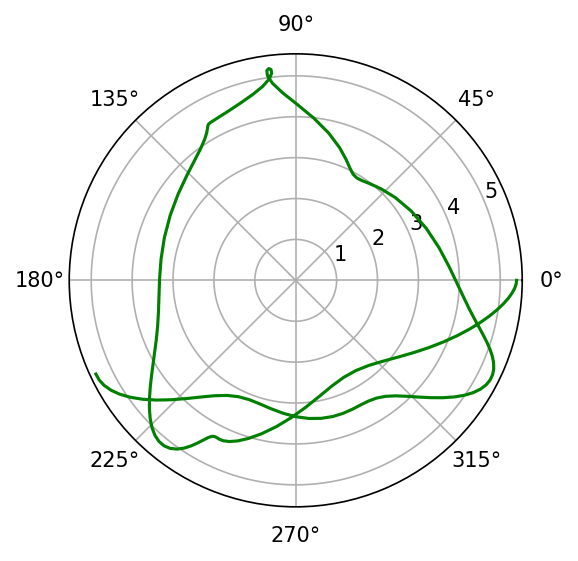

In [ ]:
plt.axes(projection = 'polar')
def r_final(t):
  return sy.sqrt(c**2+r_sec(t)**2+2*c*r_sec(t)*sy.cos(theta3(t)))
r_final_matrix = [r_final(i) for i in t_s]
def theta_final(t):
  return theta1(t)+deltaTheta2(t)+deltaTheta3(t)
theta_final_matrix = [theta_final(i) for i in t_s]
plt.polar(theta_final_matrix, r_final_matrix,'g')